# 1. PREDICTING CAR PRICES
---

## 1. Introducing the Data

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile)

**Dataset information:** three types of entities in the dataset
- the specification of an auto in terms of various characteristics, 
- its assigned insurance risk rating, 
- its normalized losses in use as compared to other cars.

**Attribute information:**
1. `symboling`:  -3, -2, -1, 0, 1, 2, 3.
    - A cars is initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. 
    - Actuarians call this process "symboling". 
    - A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
2. `normalized-losses`: continuous from 65 to 256.
    - Another factor is the relative average loss payment per insured vehicle year. 
    - This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.
3. `make`: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. `fuel-type`: diesel, gas.
5. `aspiration`: std, turbo.
6. `num-of-doors`: four, two.
7. `body-style`: hardtop, wagon, sedan, hatchback, convertible.
8. `drive-wheels`: 4wd, fwd, rwd.
9. `engine-location`: front, rear.
10. `wheel-base`: continuous from 86.6 120.9.
11. `length`: continuous from 141.1 to 208.1.
12. `width`: continuous from 60.3 to 72.3.
13. `height`: continuous from 47.8 to 59.8.
14. `curb-weight`: continuous from 1488 to 4066.
15. `engine-type`: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. `num-of-cylinders`: eight, five, four, six, three, twelve, two.
17. `engine-size`: continuous from 61 to 326.
18. `fuel-system`: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. `bore`: continuous from 2.54 to 3.94.
20. `stroke`: continuous from 2.07 to 4.17.
21. `compression-ratio`: continuous from 7 to 23.
22. `horsepower`: continuous from 48 to 288.
23. `peak-rpm`: continuous from 4150 to 6600.
24. `city-mpg`: continuous from 13 to 49.
25. `highway-mpg`: continuous from 16 to 54.
26. `price`: continuous from 5118 to 45400.
    - This is likely the target attribute that we will be trying to predict

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)

file = 'data/imports-85.data'
cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 
        'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 
        'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 
        'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 
        'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv(file)
cars.columns = cols
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [2]:
cars.shape

(204, 26)

## 2. Determining Data Types

When trying to determine what type of data we have, it's always a good idea to try `dtypes` and `describe` methods first. And below we find that:
- while the `symboling` column is of the `int64` dtype, it is actually a categorical attribute whose categories are expressed numerically with a natural order but where the distances between categories is not known (ordinal data)
- the `normalized_losses` should be a numerical attribute but is shown as of the `object` dtype
- the `num_cylinders` is a discrete variable and should be `int` type. However, we can put it in the category columns, just like the `num_doors`
- the columns from `bore` to `price` should be of `float` since they are continuous (see 'attribute information'). Some cleaning will have to be done.

Another layer of information we can use to determine what kind of data we have is looking at the cardinality of each column; that is the number of categories in each column. Continuous data (float) tend to have way more categories than any other type of data.

In [3]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [4]:
cars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
cars.nunique()

symboling              6
normalized_losses     52
make                  22
fuel_type              2
aspiration             2
num_doors              3
body_style             5
drive_wheels           3
engine_location        2
wheel_base            53
length                75
width                 44
height                49
curb_weight          171
engine_type            7
num_cylinders          7
engine_size           44
fuel_system            8
bore                  39
stroke                37
compression_ratio     32
horsepower            60
peak_rpm              24
city_mpg              29
highway_mpg           30
price                186
dtype: int64

In [6]:
num_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 
            'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 
            'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']

cat_cols = ['symboling', 'make', 'fuel_type', 'aspiration', 'num_doors', 
            'body_style', 'drive_wheels', 'engine_location', 'engine_type', 
            'num_cylinders', 'fuel_system']

y_col = ['price']

## 3. Changing Numerical Data Types 

We know that there are some entries with `?` representing missing values. In fact, for the `normalized_losses` column, they account for almost `20%` of the entries. 
- Let's first replace all `?` with `Nan`
- Then set dtype of `num_cols` and `price` to `float`

In [7]:
cars['normalized_losses'].value_counts()[:5] / len(cars)

?      0.196078
161    0.053922
91     0.039216
150    0.034314
134    0.029412
Name: normalized_losses, dtype: float64

In [8]:
cars = cars.replace('?', np.nan)
cars[num_cols] = cars[num_cols].astype('float')
cars['price'] = cars['price'].astype('float')
cars.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight          float64
engine_type           object
num_cylinders         object
engine_size          float64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg             float64
highway_mpg          float64
price                float64
dtype: object

## 4. Exploring Numerical Missing Values

In [9]:
num_cars = cars[num_cols]
num_cars.isnull().mean()

normalized_losses    0.196078
wheel_base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb_weight          0.000000
engine_size          0.000000
bore                 0.019608
stroke               0.019608
compression_ratio    0.000000
horsepower           0.009804
peak_rpm             0.009804
city_mpg             0.000000
highway_mpg          0.000000
dtype: float64

Text(0.5, 1.0, 'Quantifying Missing Data')

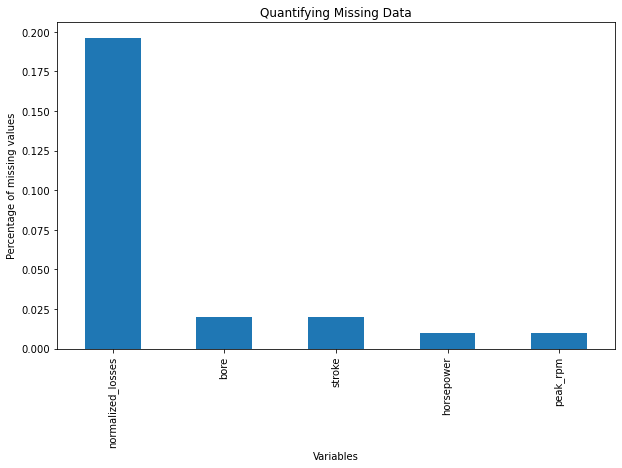

In [10]:
import matplotlib.pyplot as plt

num_missing = ['normalized_losses', 'bore', 'stroke', 
               'horsepower', 'peak_rpm']
num_cars[num_missing].isnull().mean().plot.bar(figsize=(10,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying Missing Data')

Some of the ways to deal with missing values is to:
- delete the rows with missing data: this is not an option for us since we already have a small dataset and only one colum has a lot of missing data
- delete the column: in this case we would delete `normalized_losses` assuming it is not very important since it's missing almost 20% of the data. 
- impute the mean or median: this would work well for the other columns with a small percentage of missing values

## 5. Dealing with Missing Values in `normalized_losses`
A look back in our *Attribute information*, we find that the `normalized_losses` "value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year". This could help us deal better with the missing values. We can group the values by car size and see how much of the missing data is in each class size.

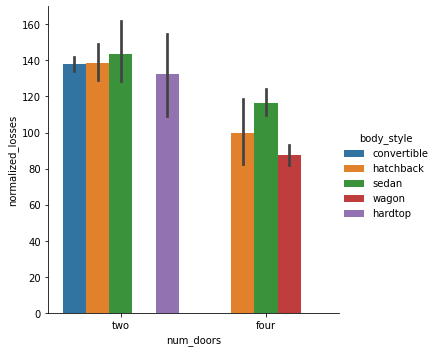

In [17]:
import seaborn as sns

sns.catplot(x="num_doors", y="normalized_losses", hue="body_style", kind="bar", data=cars)